# Section one - Data Analysis and Comprehension

# 0. Imports 

In [1]:
import warnings
import pandas                  as pd
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf

from matplotlib                import pyplot as plt
from IPython.core.display      import HTML
  
from sklearn.model_selection   import train_test_split, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing     import LabelEncoder, PolynomialFeatures
from sklearn.ensemble          import RandomForestRegressor
from sklearn                   import linear_model
from sklearn                   import metrics
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, RFE, RFECV
from sklearn.svm               import SVR



warnings.filterwarnings('ignore') 

# 0.1. Helper Functions

In [2]:
# --- Jupyter Notebook Settings
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25,12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>' ) )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# 0.2. Loading Data

In [4]:
df_raw = pd.read_csv('C:/Users/Cidones/Desktop/house_rocket_project/kc_house_data.csv')

    1. Identify peek at your data
    2. Dimensions of your data
    3. Data Type for each attribute
    4. Descriptive Statistics
       4.1 Central tendency
            4.1.1 Mean, Median, Mode
       4.2 Dispersion

# 1.0. Data Preparation


## 1.1 Rename Attributes


In [5]:
df1 = df_raw.copy()
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [62]:
#new columns name
#new_cols = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'area_living', 'area_lot', 'floors' 'waterfront', 'house_view', 'house_condition', 'house_grade', 'area_above', 'area_basement', 'year_built', 'year_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
#rename 
#df1.columns = new_cols 
# ERROR

## 1.2. Format of Attributes

In [6]:
df1.dtypes


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
df1['bathrooms'] = np.round(df1['bathrooms'], 1)

#convert date from string to datetime64
df1['date'] = pd.to_datetime( df1['date'])

df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.2,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

# 2.0. Describe Data

In [9]:
 df2 = df1.copy()

## 2.1. Data Dimensions

In [10]:
print( 'Number of Rows: {}'.format( df2.shape[0] ) )
print( 'Number of Columns: {}'.format ( df2.shape[1] ) )

Number of Rows: 21613
Number of Columns: 21


## 2.2. Data Type Attributes


In [11]:
print(df2.dtypes)

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object


## 2.3. Number of NA

In [12]:
df2.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


## 2.4. Descriptive Statistics

In [20]:
#separate the categorical from numerical features
num_attributes  = df2.select_dtypes( include = ['int64', 'float64', 'datetime64'] )
cat_attributes = df2.select_dtypes( exclude = ['int64', 'float64', 'datetime64'] )

print( 'Num of Categorical : {}'.format( cat_attributes.shape[1]) )
print( 'Num of Numerical: {}'.format( num_attributes.shape[1] ) )

Num of Categorical : 0
Num of Numerical: 21


## 2.4.1 Central Tendency and Dispersion


###### 2.4.1.1. Numerical Attributes


In [15]:
#Measure of Central Tendency
ct1 = pd.DataFrame( num_attributes.apply( mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( median ) ).T
ct3 = pd.DataFrame( num_attributes.apply( lambda x: x.mode() ) )

# Dispersion
d1 = pd.DataFrame( num_attributes.apply( std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T


m = pd.concat( [ct1, ct2, ct3, d1, d2, d3, d4, d5, d6] ).T.reset_index()
print(m)
#m.columns = ['attributes', 'mean', 'median', 'mode', 'standard_deviation', 'min', 'max', 'range', 'kurtosis', 'skew']


            index           0            0            0        1        2        3           0           0            0            0                                                  0         0
0              id  4.5803e+09  3.90493e+09  7.95001e+08      NaN      NaN      NaN  2.8765e+09  1.0001e+06      9.9e+09    9.899e+09  <bound method Series.kurt of 0        9.815189...  0.243329
1           price      540088       450000       350000   450000      NaN      NaN      367119       75000      7.7e+06    7.625e+06  <bound method Series.kurt of 0        9.815189...   4.02407
2        bedrooms     3.37084            3            3      NaN      NaN      NaN     0.93004           0           33           33  <bound method Series.kurt of 0        9.815189...    1.9743
3       bathrooms     2.11881          2.2          2.5      NaN      NaN      NaN    0.766858           0            8            8  <bound method Series.kurt of 0        9.815189...  0.508751
4     sqft_living      2079.9 

In [16]:
num_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.118808e+00,7.668758e-01,0.000000e+00,1.800000e+00,2.200000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


# EDA - Exploration Data Analysis

## 3.1. Univariate Analysis

In [17]:
df3 = df2.copy()

## 3.1.1. Response Variable

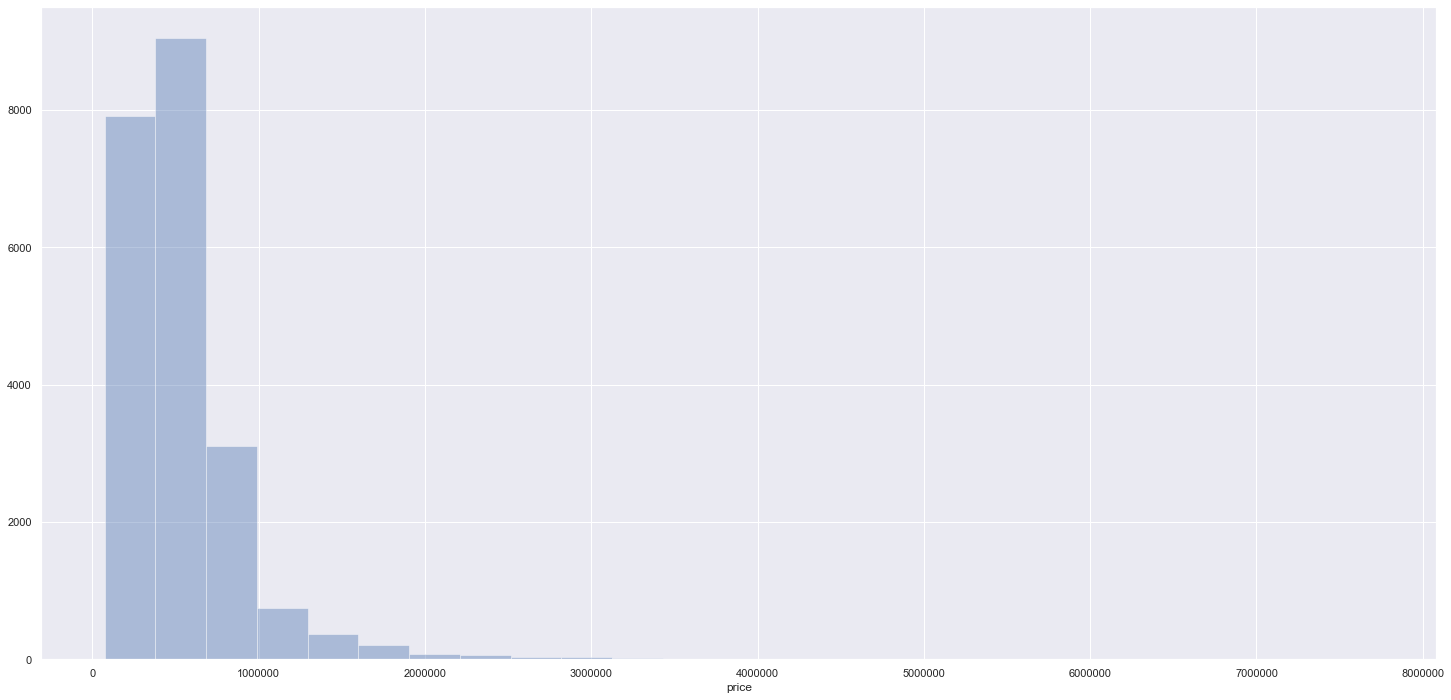

In [73]:
sns.distplot( df3['price'], kde=False, bins=25 );

## 3.1.2. Numerical Predictors

### 3.1.2.1. bedrooms

In [19]:
df3['bedrooms'].mode()

0    3
dtype: int64

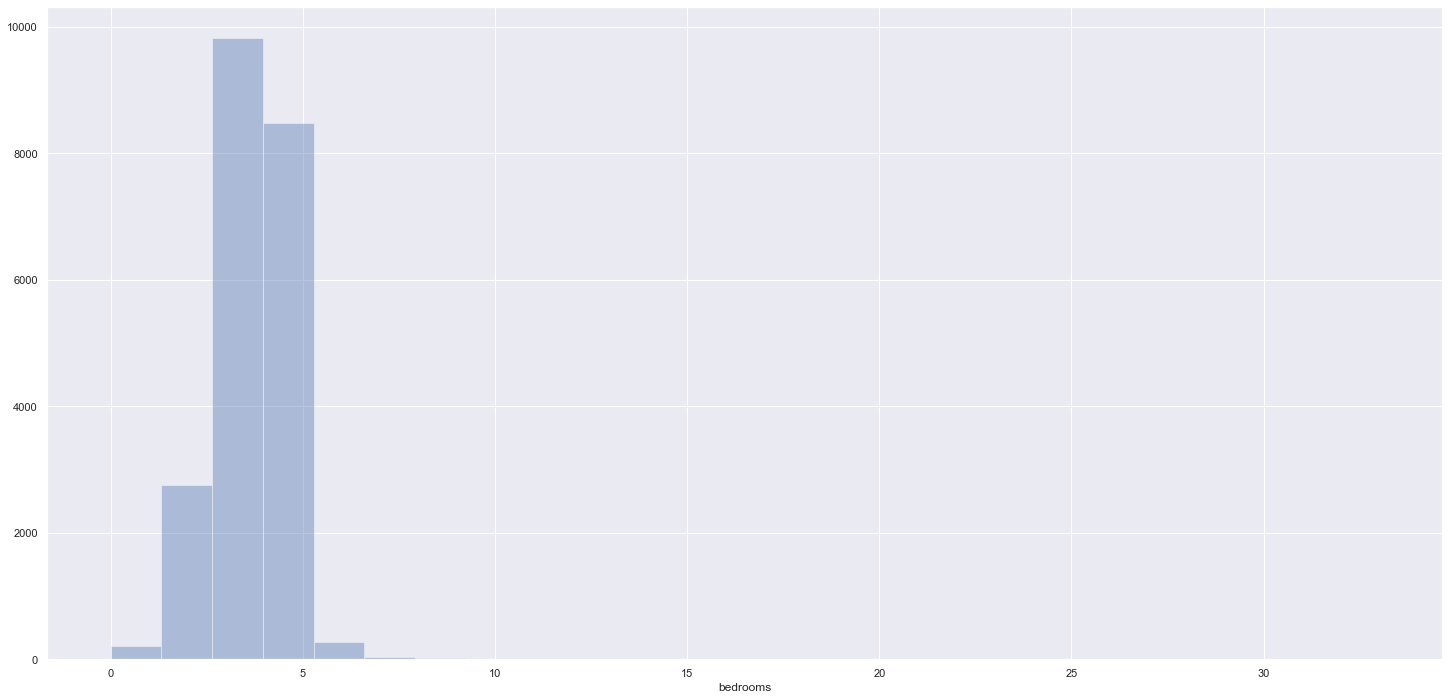

In [72]:
sns.distplot( df3['bedrooms'], kde=False, bins=25 );

### 3.1.2.1. bathrooms

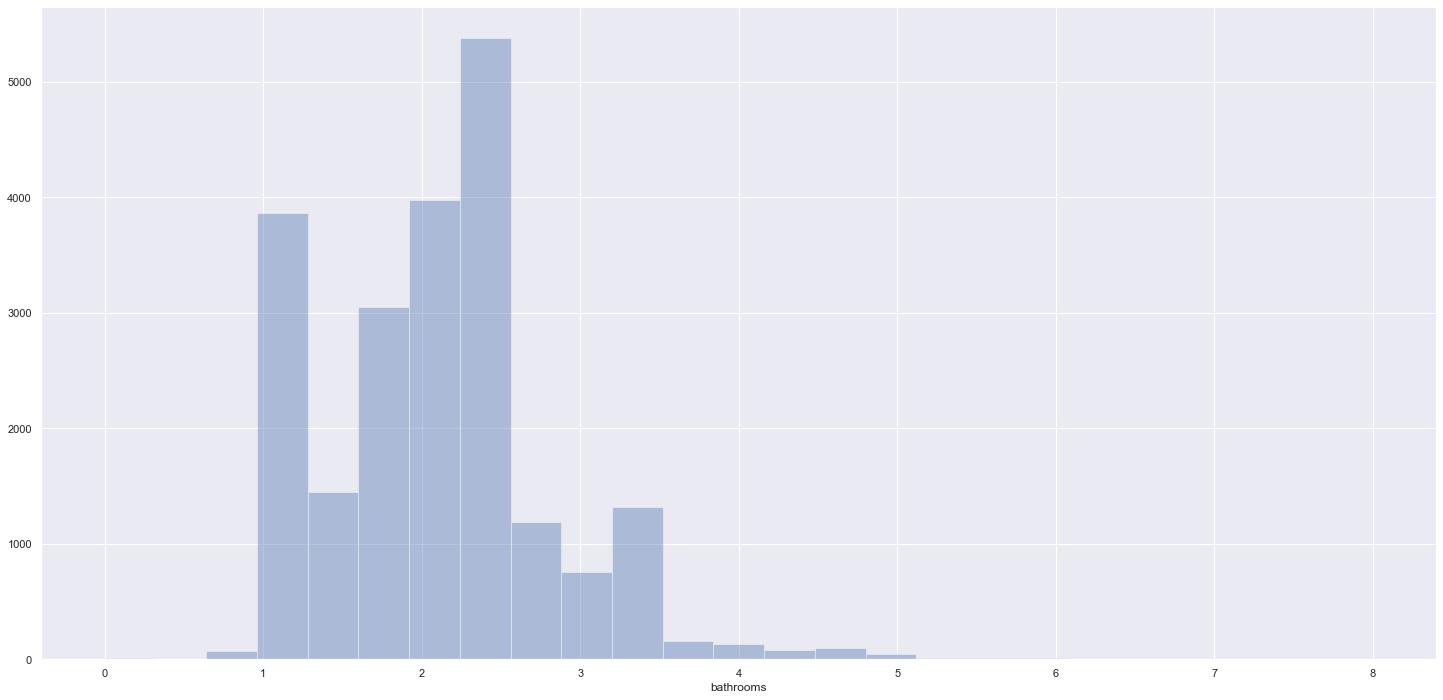

In [71]:
sns.distplot( df3['bathrooms'], kde=False, bins=25 );

### 3.1.2.1. sqft_living

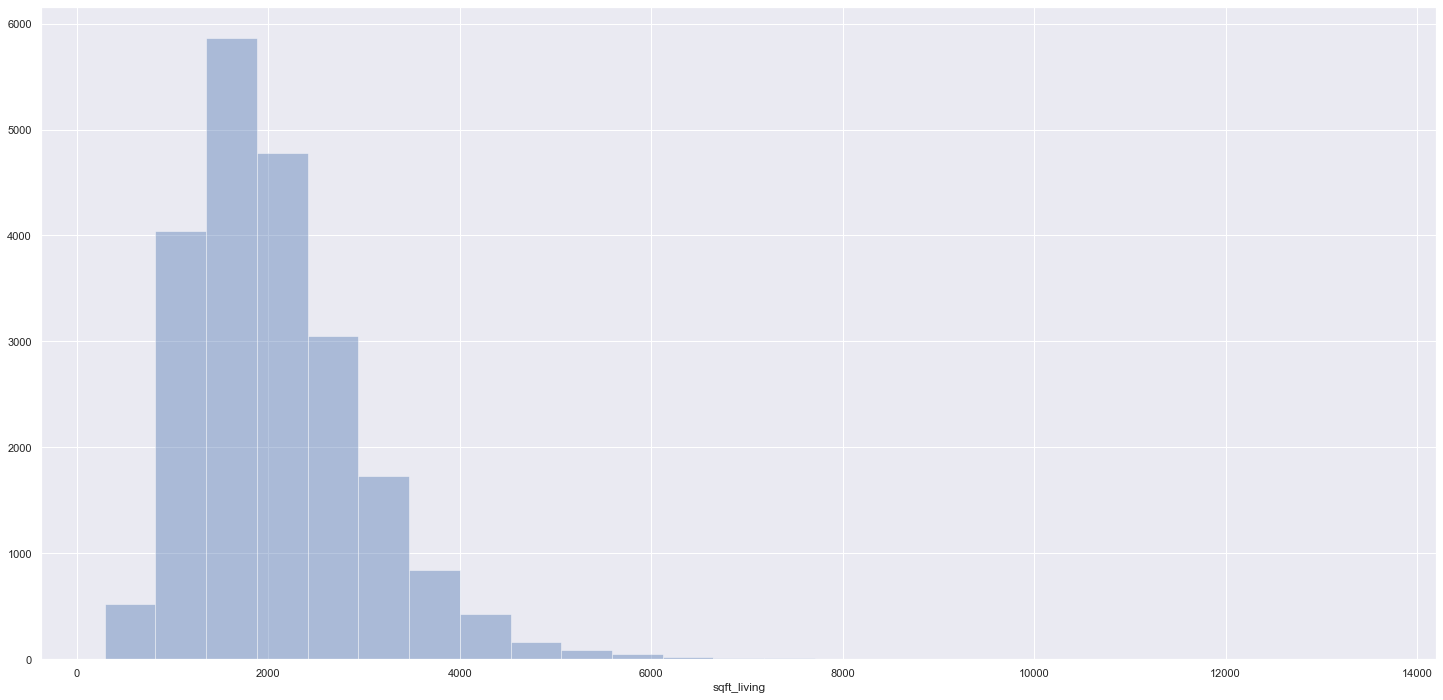

In [70]:
sns.distplot( df3['sqft_living'], kde=False, bins=25 );

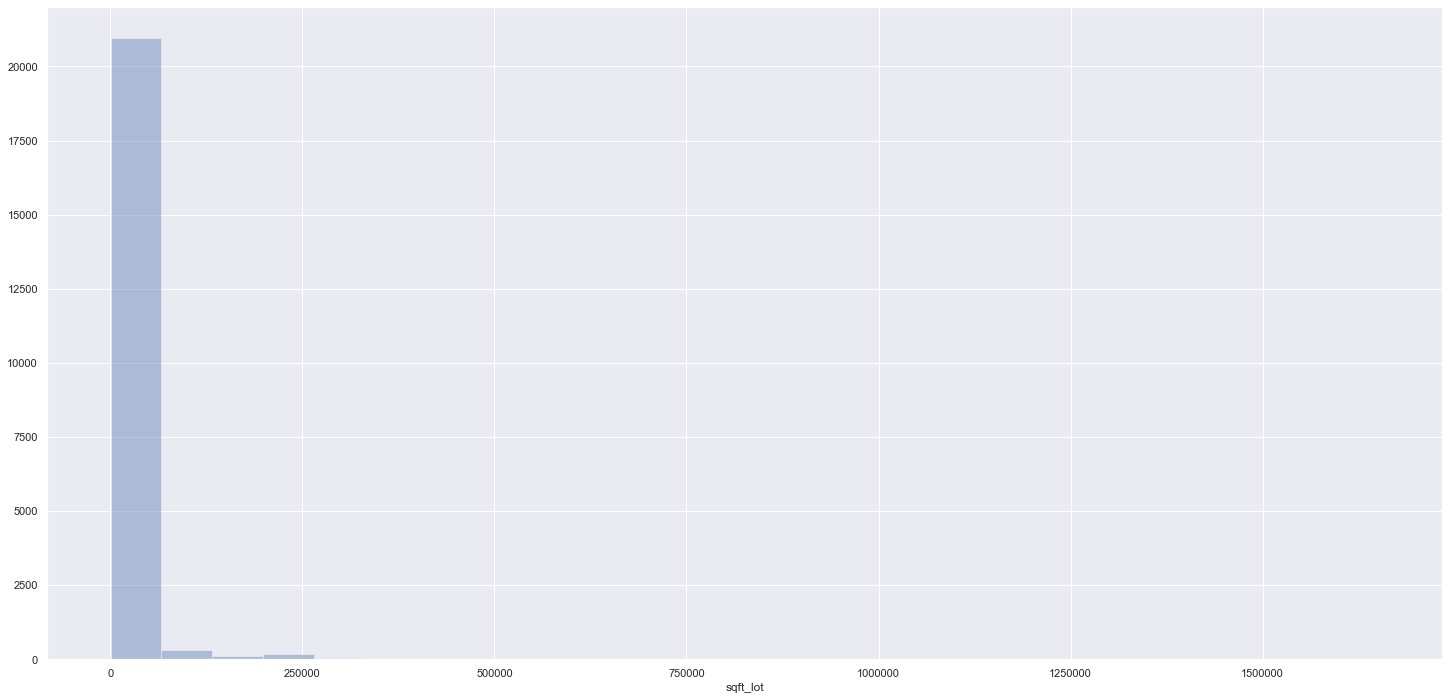

In [69]:
sns.distplot( df3['sqft_lot'], kde=False, bins=25 );

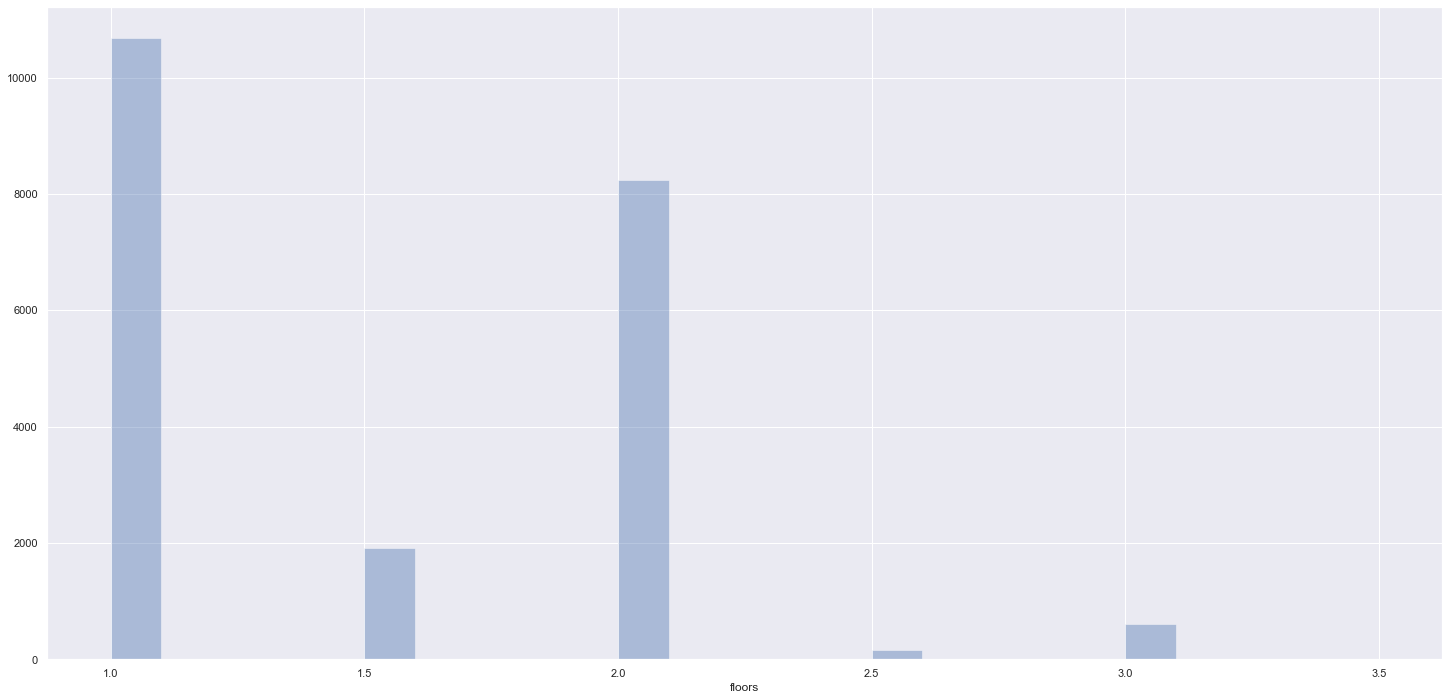

In [68]:
sns.distplot( df3['floors'], kde=False, bins=25 );

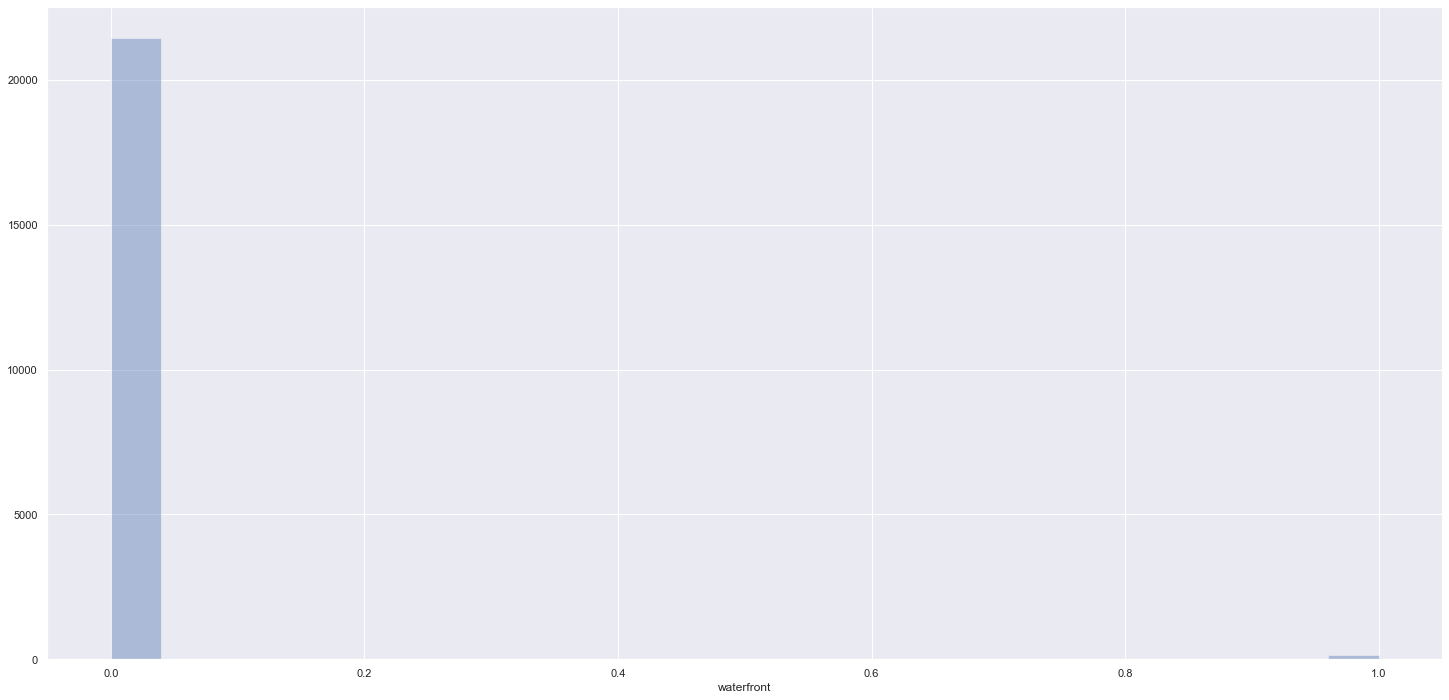

In [67]:
sns.distplot( df3['waterfront'], kde=False, bins=25 );

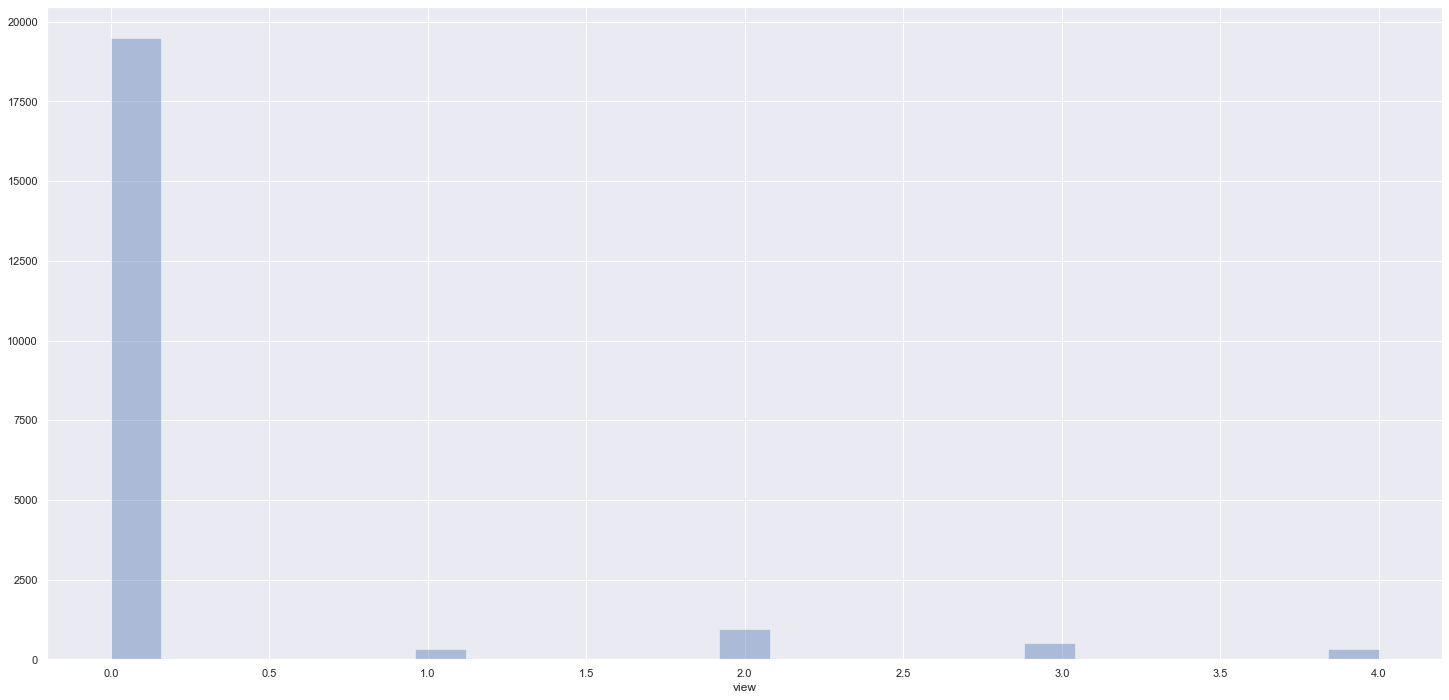

In [66]:
sns.distplot( df3['view'], kde=False, bins=25 );

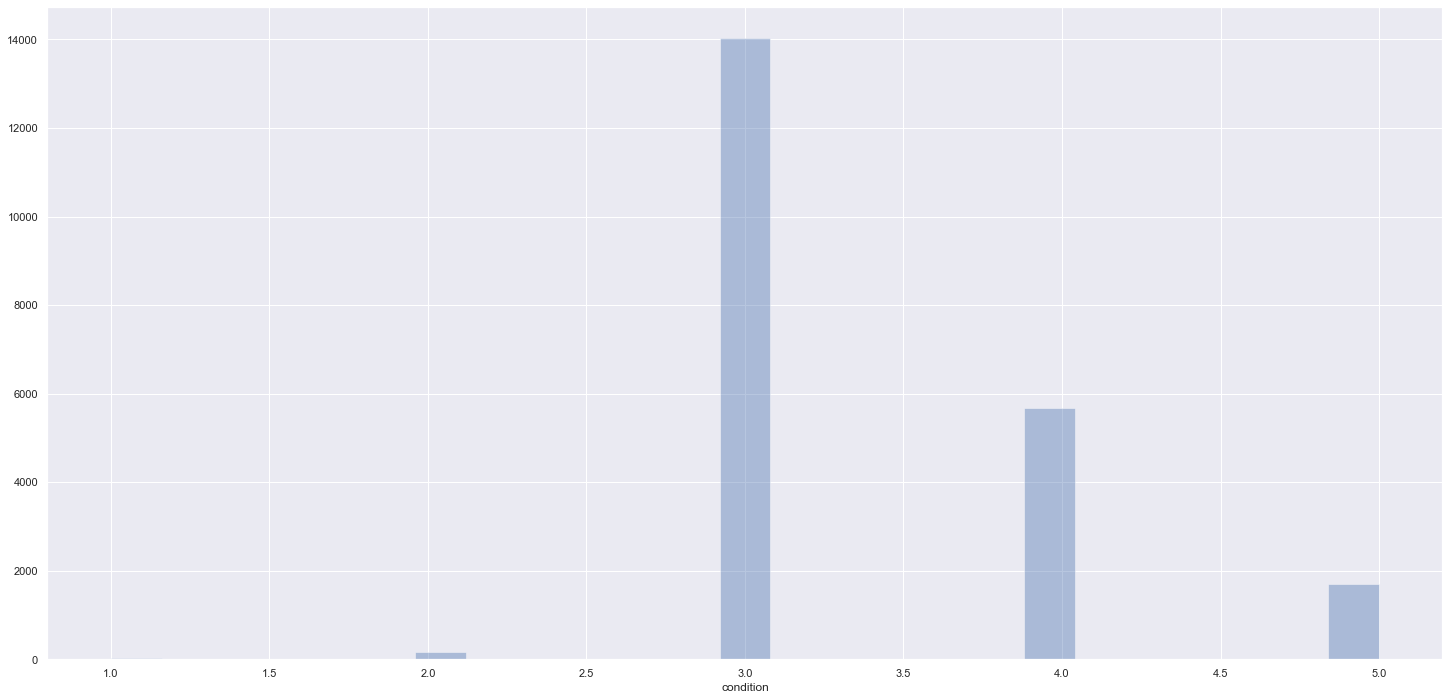

In [65]:
sns.distplot( df3['condition'], kde=False, bins=25 );

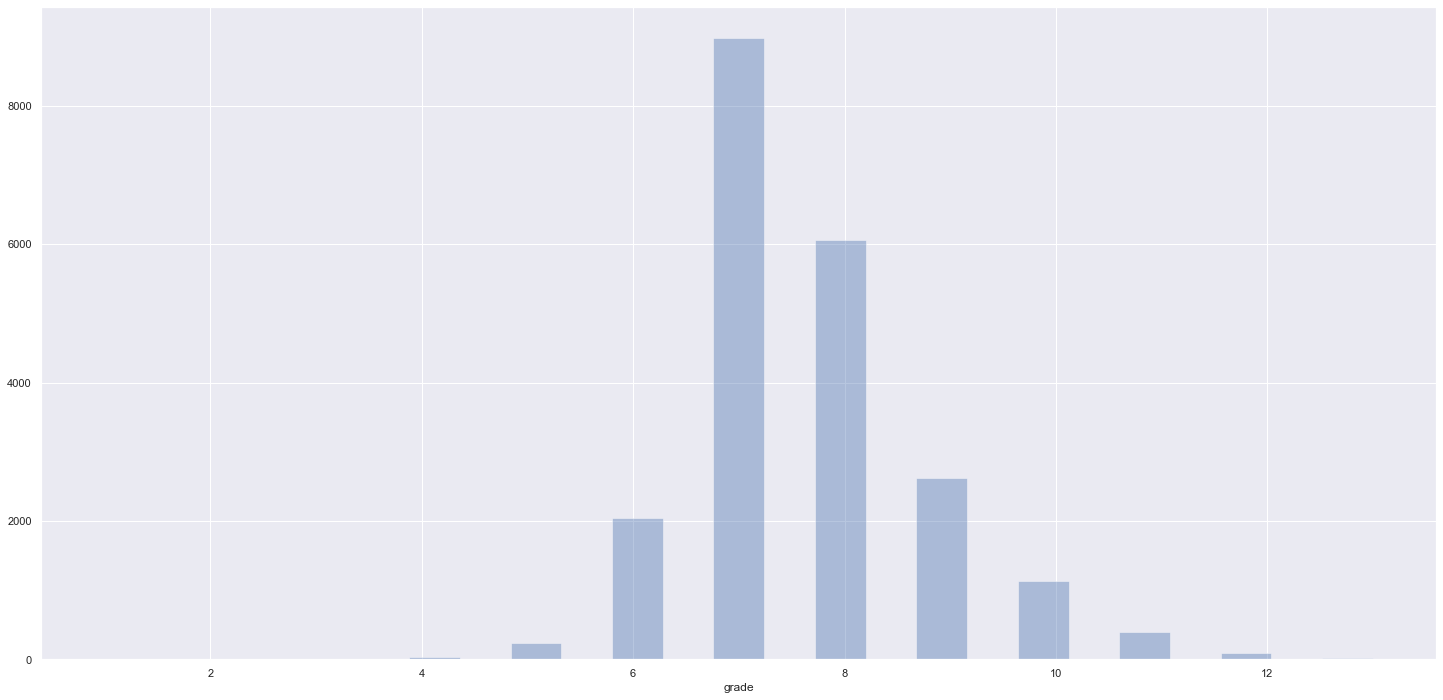

In [64]:
sns.distplot( df3['grade'], kde=False, bins=25 );

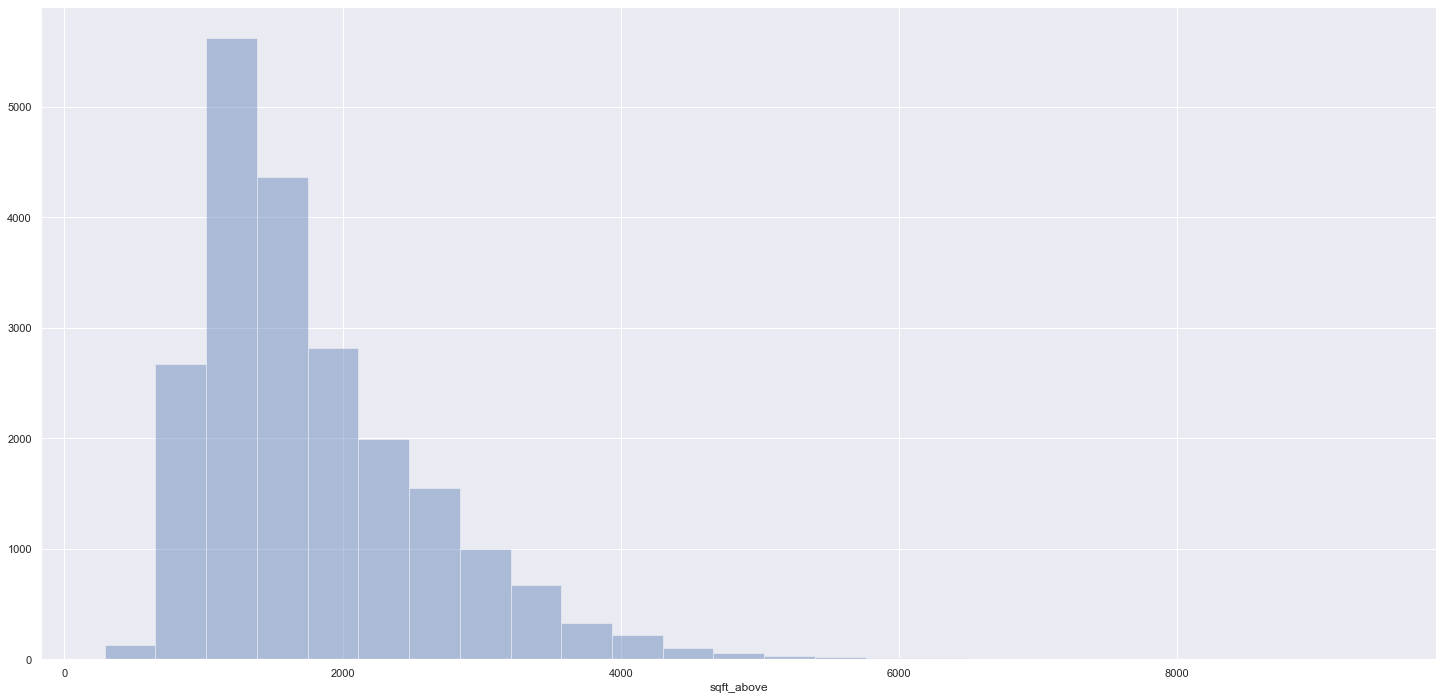

In [62]:
sns.distplot( df3['sqft_above'], kde=False, bins=25 );

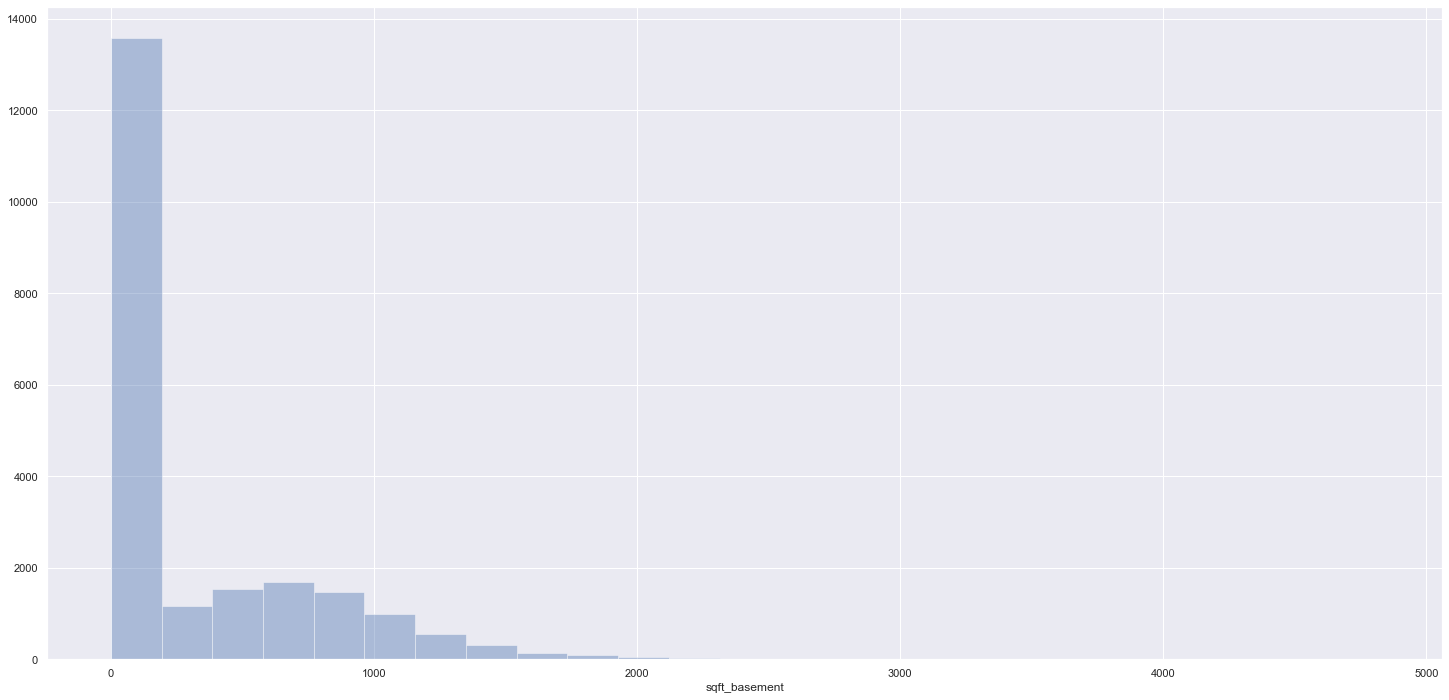

In [61]:
sns.distplot( df3['sqft_basement'], kde=False, bins=25 );

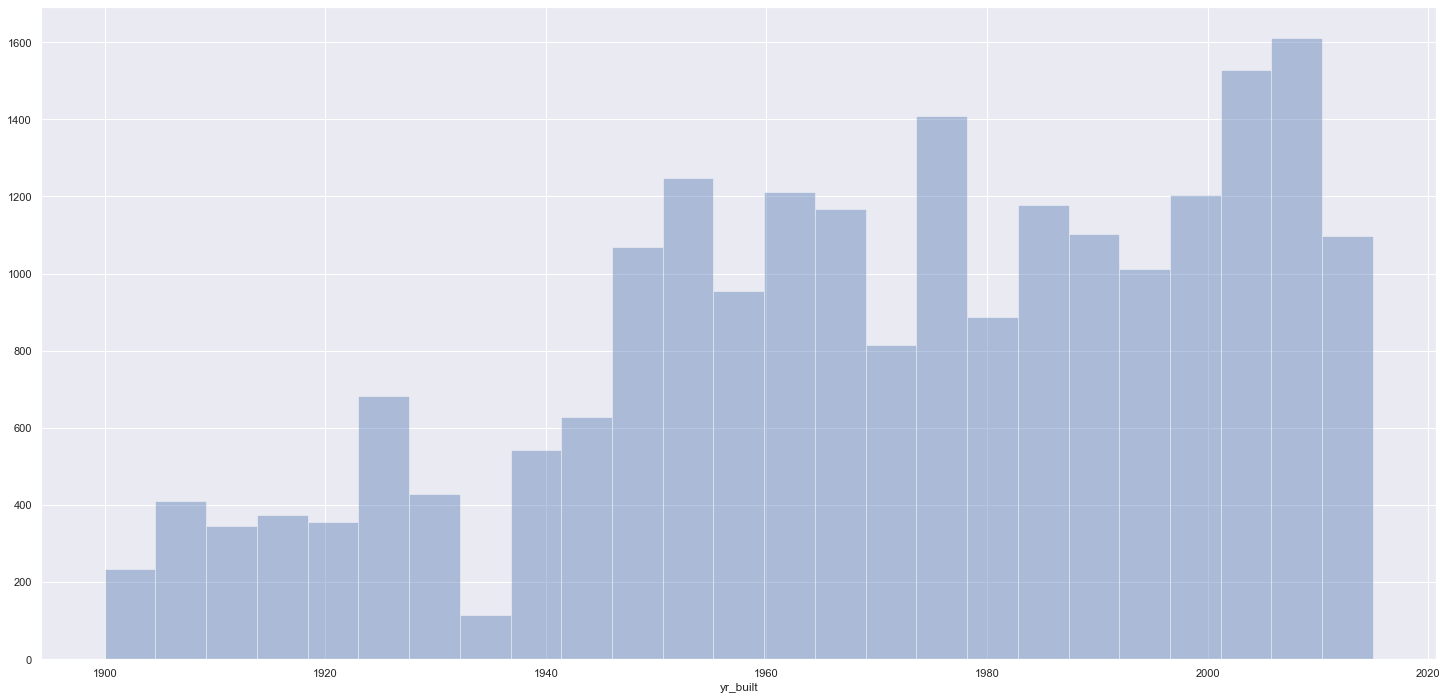

In [60]:
sns.distplot( df3['yr_built'], kde=False, bins=25 );

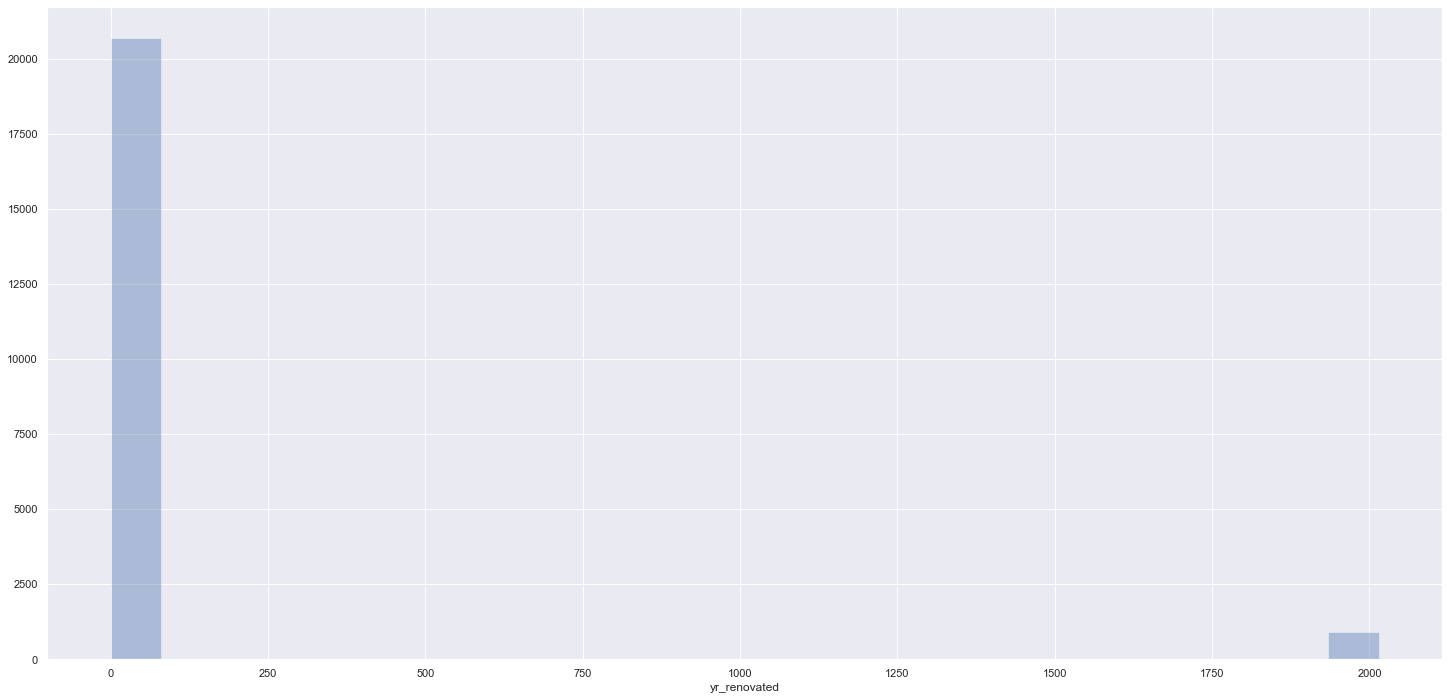

In [59]:
sns.distplot( df3['yr_renovated'], kde=False, bins=25 );

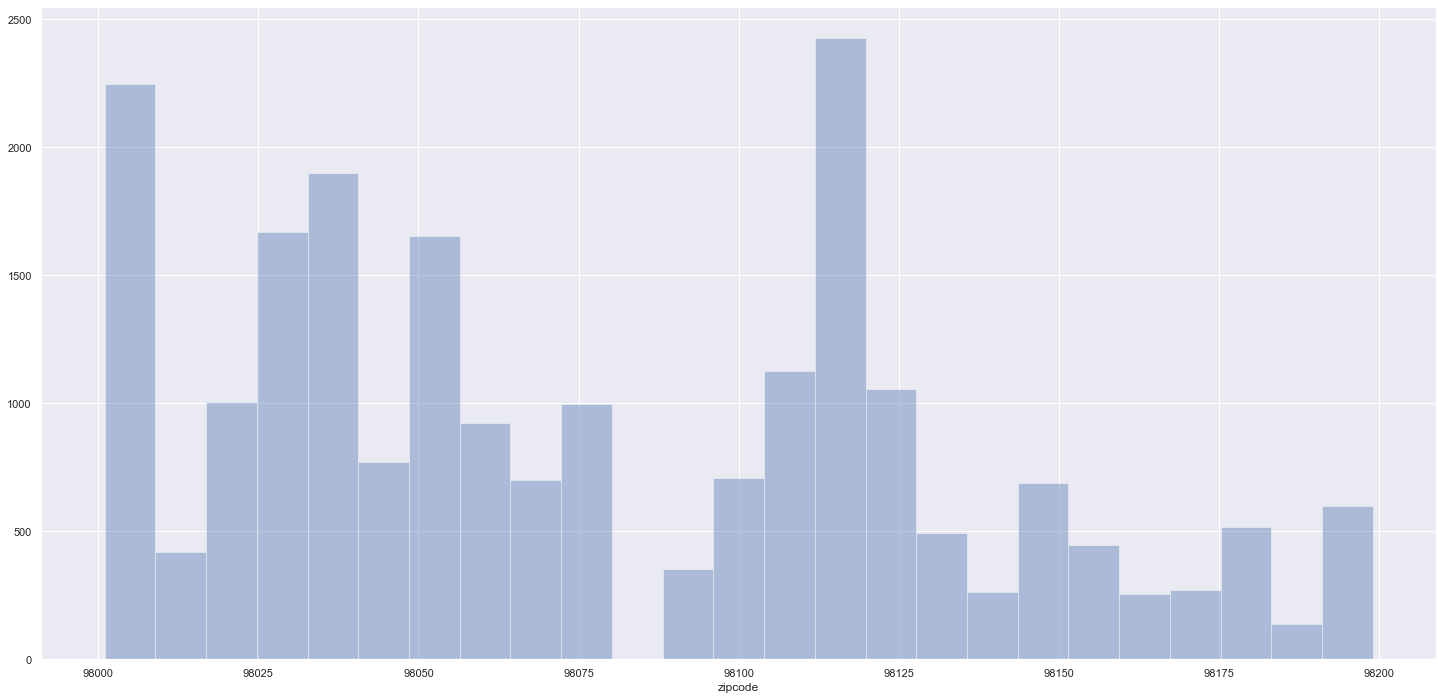

In [58]:
sns.distplot( df3['zipcode'], kde=False, bins=25 );

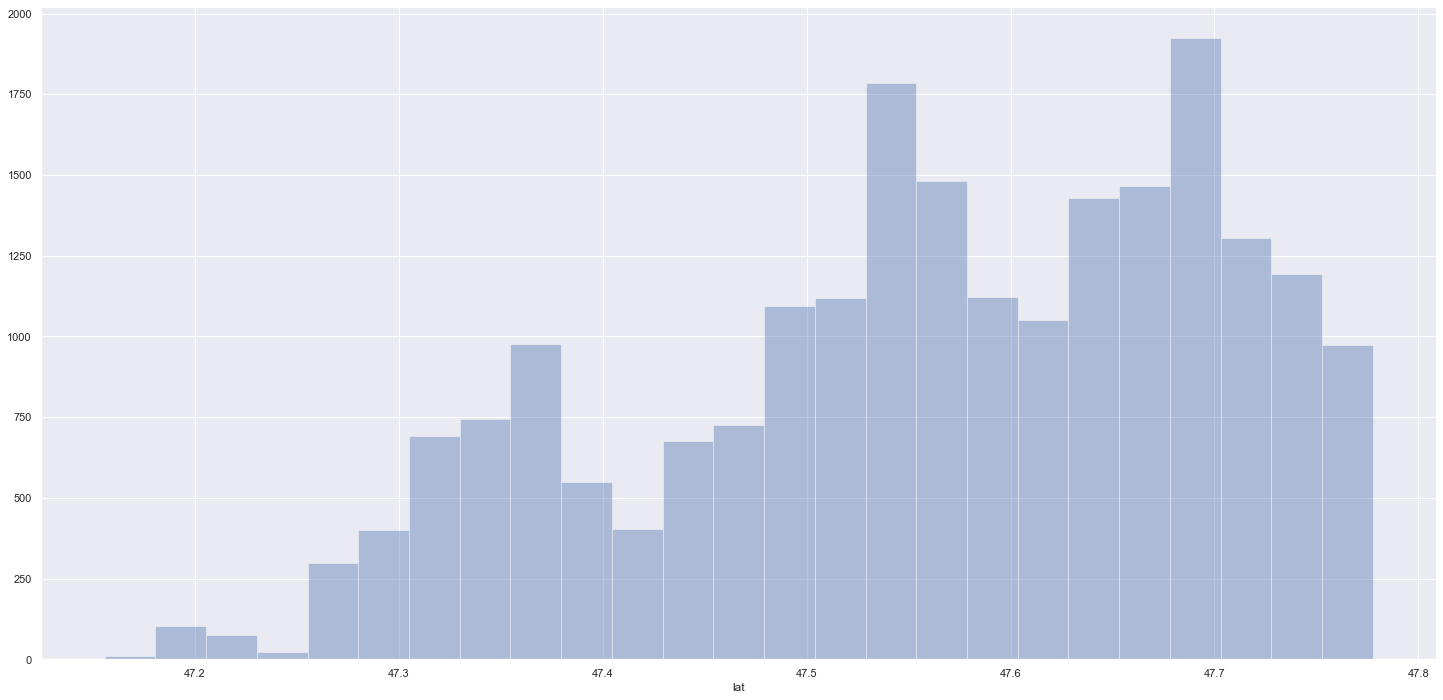

In [57]:
sns.distplot( df3['lat'], kde=False, bins=25 );

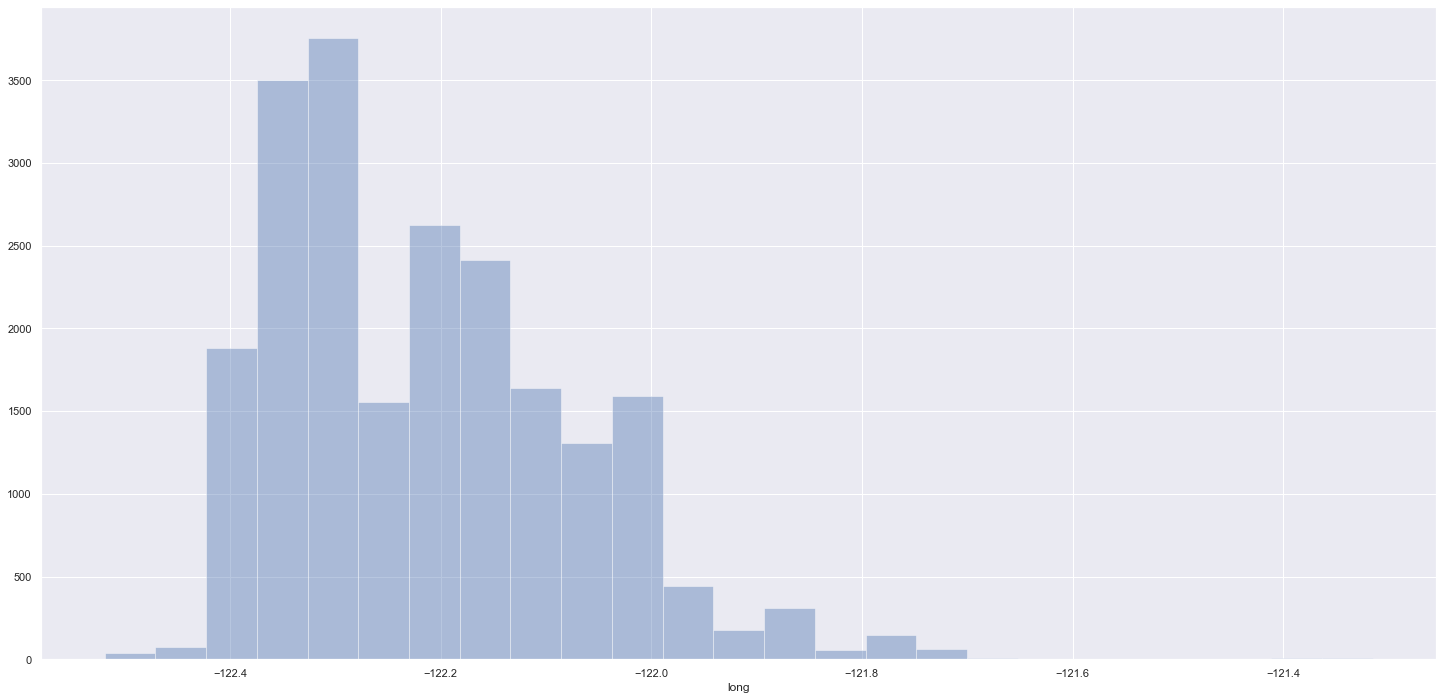

In [74]:
sns.distplot( df3['long'], kde=False, bins=25 );

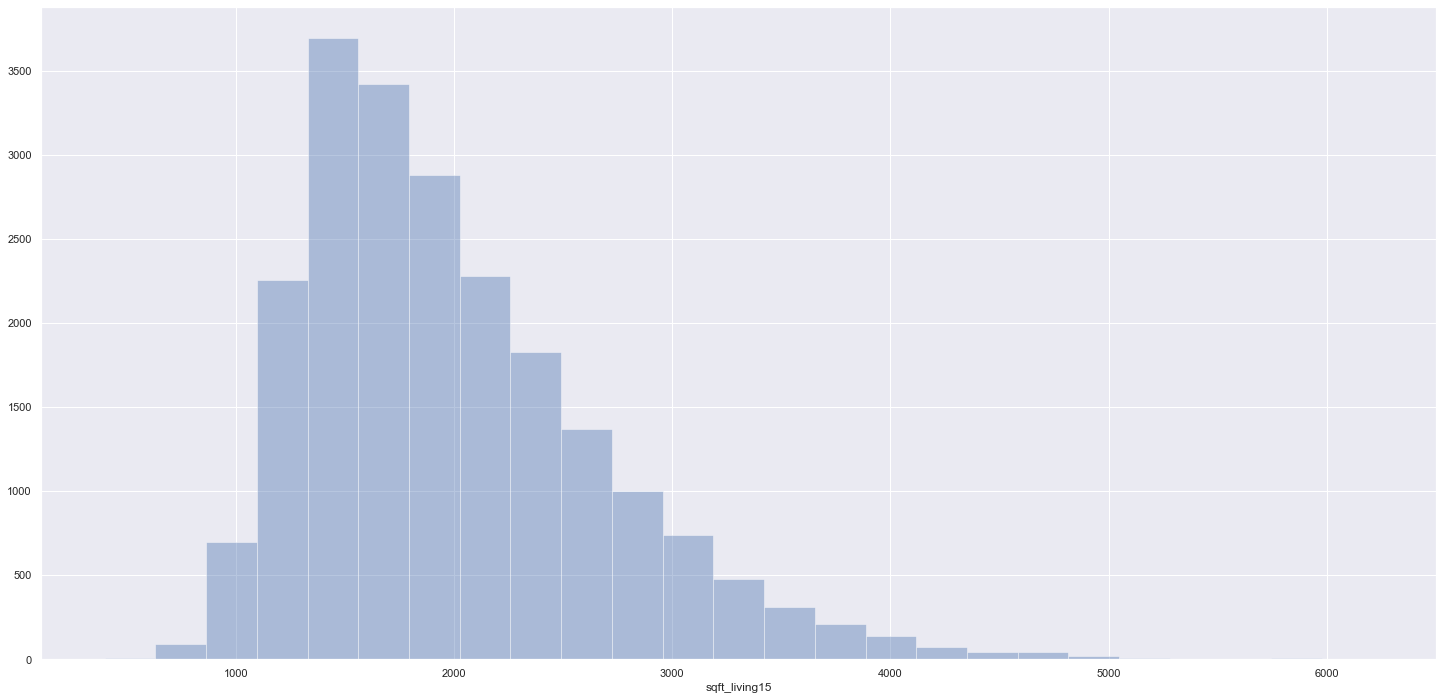

In [75]:
sns.distplot( df3['sqft_living15'], kde=False, bins=25 );

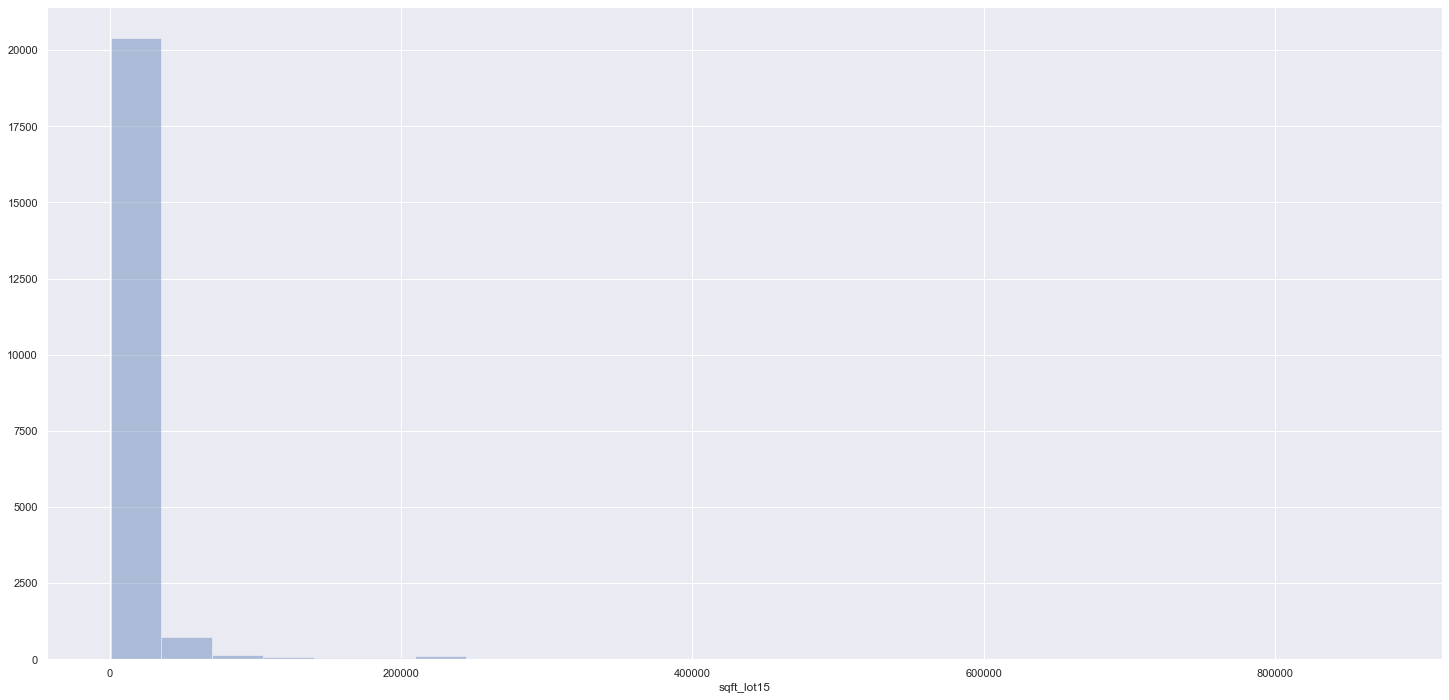

In [77]:
sns.distplot( df3['sqft_lot15'], kde=False, bins=25 );

## 3.2.0. Bivariate Analysis

In [29]:
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.2,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 3.2.1. Numerical Predictors

### 3.2.1.1. price x bedrooms

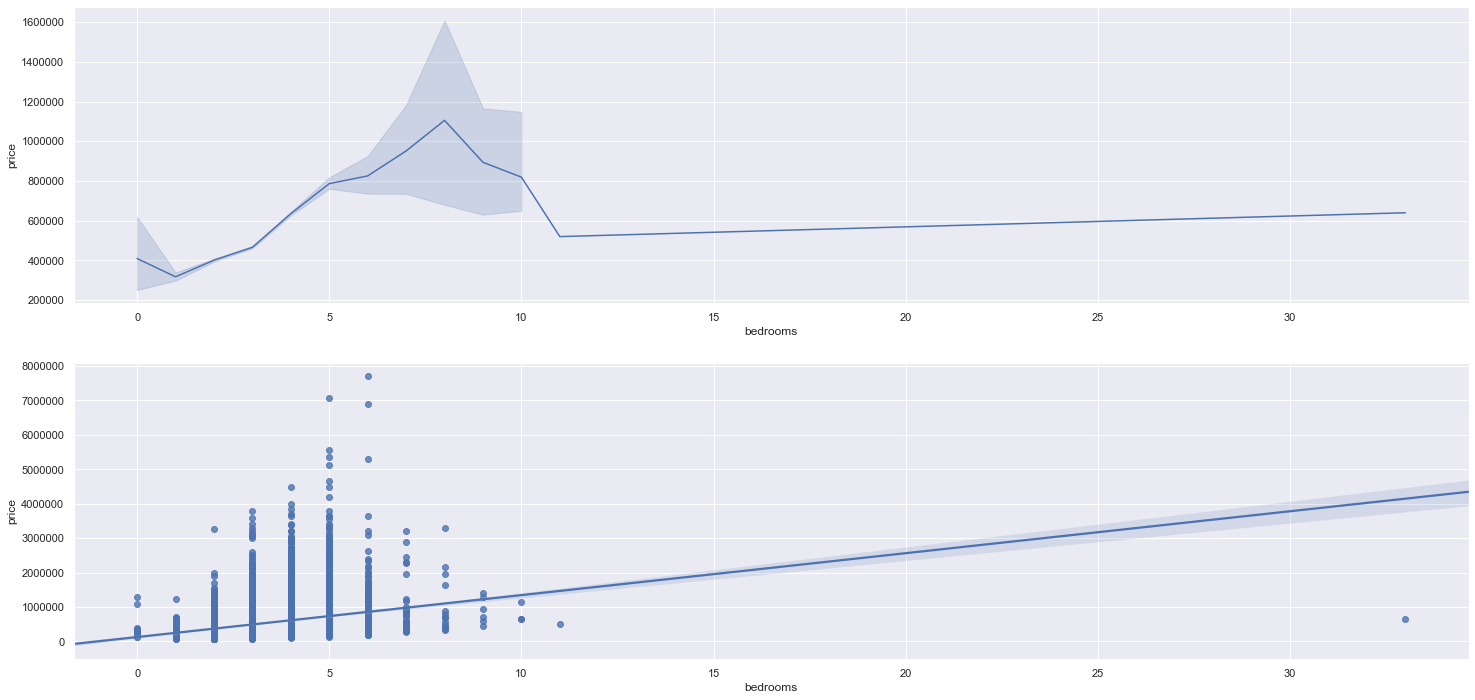

In [31]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='bedrooms', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='bedrooms', y='price', data=df3 );

### 3.2.1.1. price x bathrooms

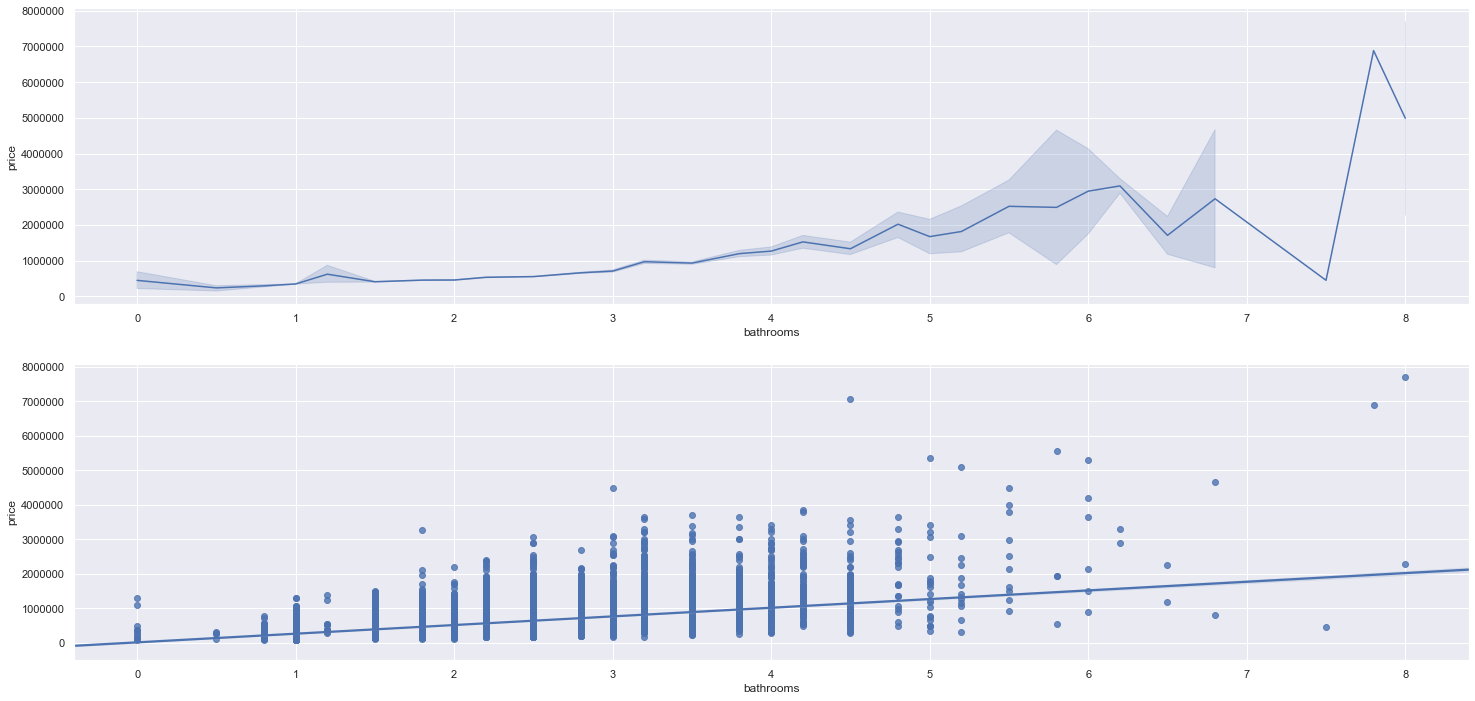

In [32]:
plt.subplot( 2, 1, 1 )
sns.lineplot( x='bathrooms', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='bathrooms', y='price', data=df3);

### 3.2.1.1. price x sqft_living

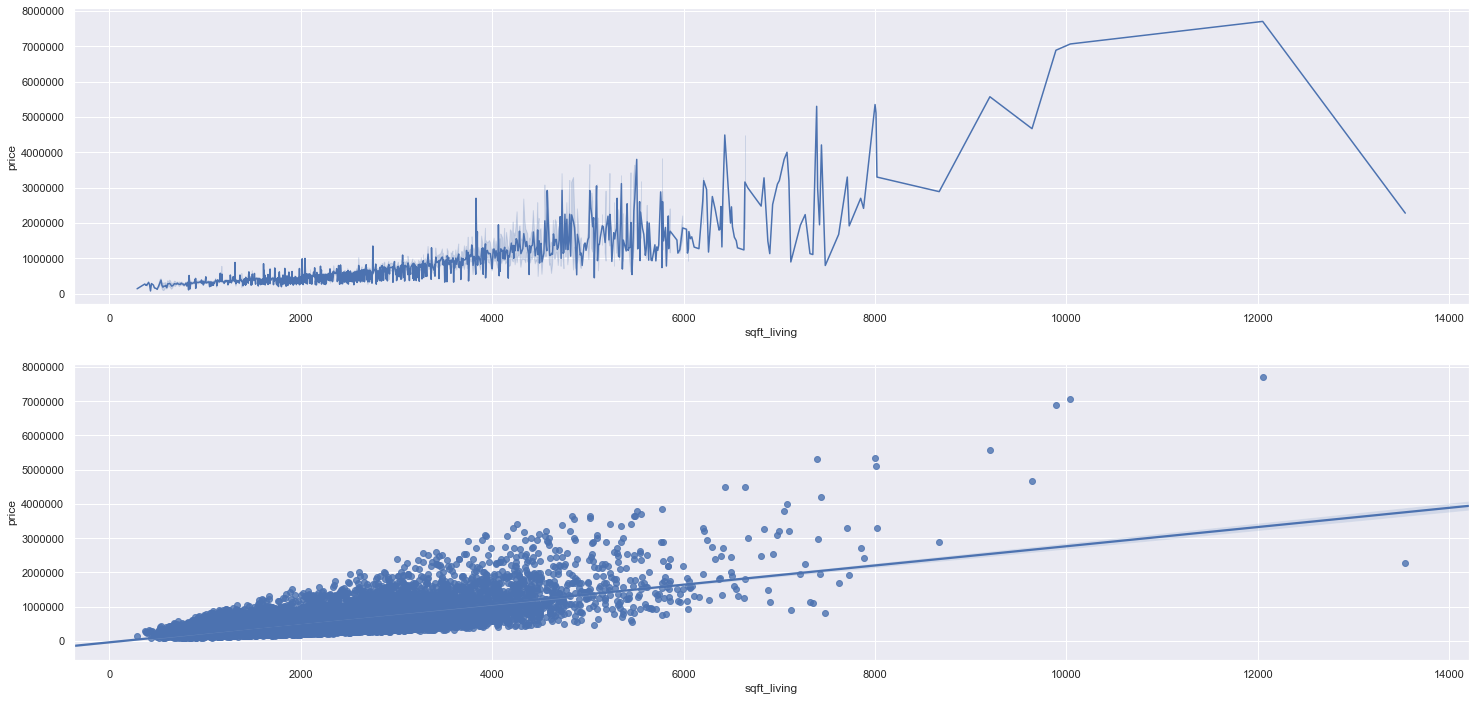

In [33]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='sqft_living', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='sqft_living', y='price', data=df3 );

# 3.3. Multivariate Analysis

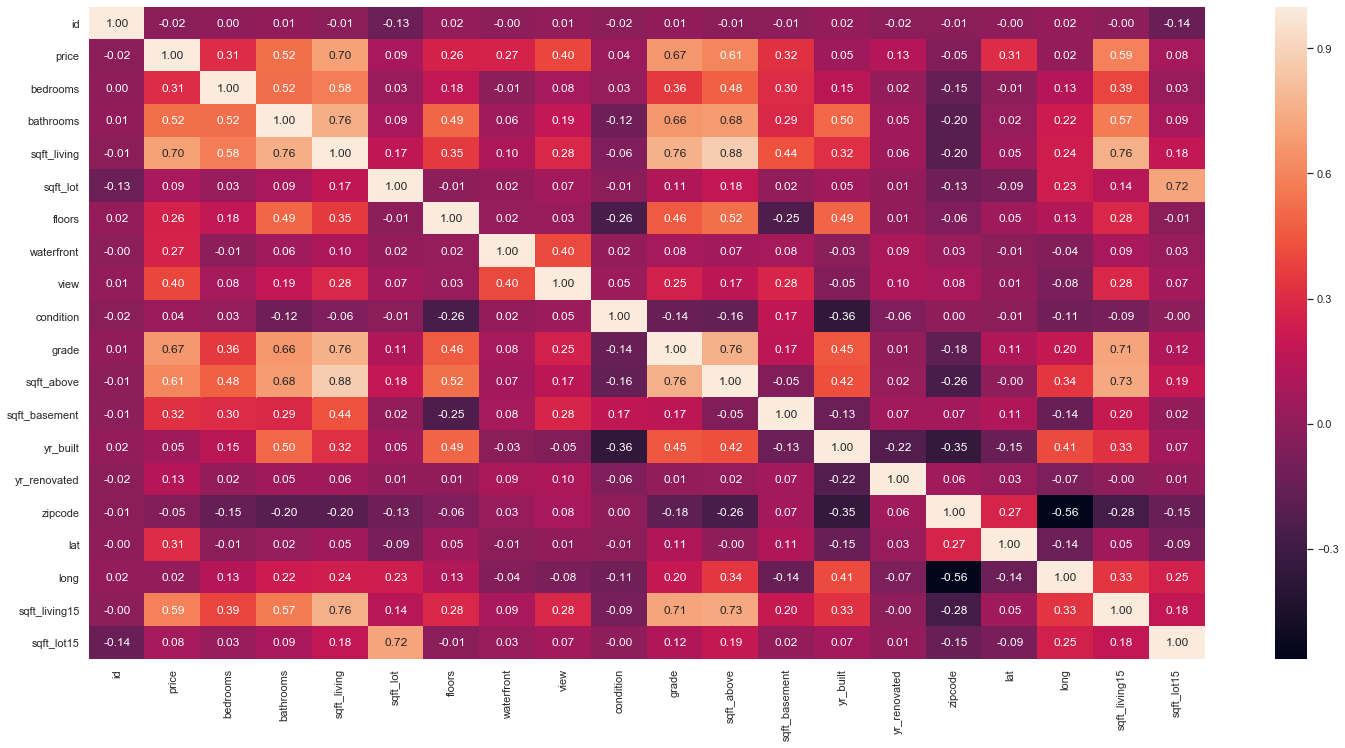

In [23]:
corr = num_attributes.corr()
sns.heatmap( corr, annot=True, fmt=".2f" )

plt.show()